In [34]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

iris_data = load_iris()

x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11)

dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)

export_graphviz(dt_clf, out_file = "tree.dot", class_names = iris_data.target_names, \
    feature_names = iris_data.feature_names, impurity = True, filled = True)

In [35]:
iris_data.data.shape

(150, 4)

In [36]:
iris_data.data.ndim

2

In [41]:
iris_data.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [38]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
print(type(iris_data.data))

<class 'numpy.ndarray'>


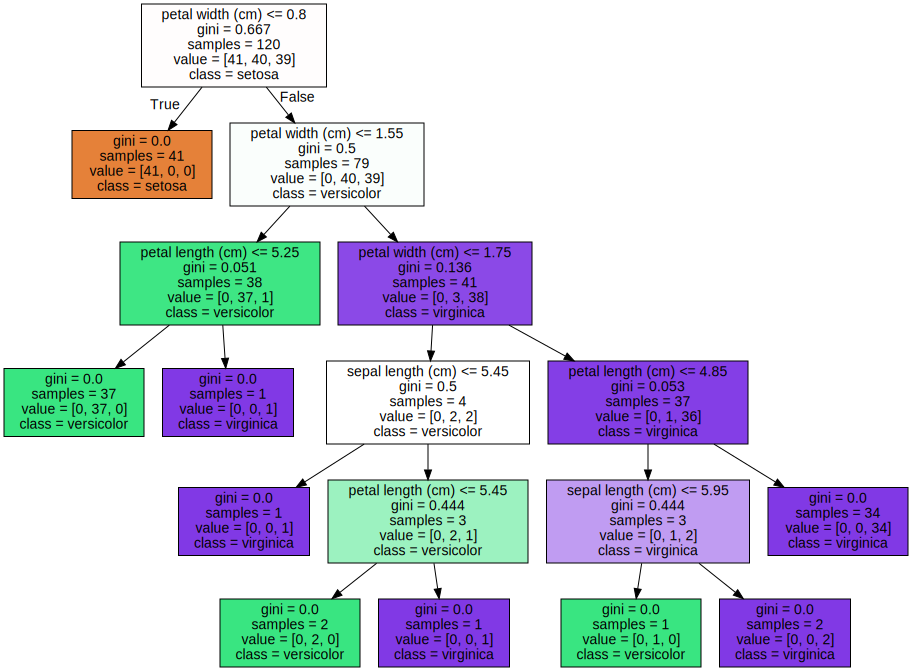

In [40]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## tree2.dot: max_depth이 3으로 트리의 깊이가 3이 되면 노드 분할을 멈춤

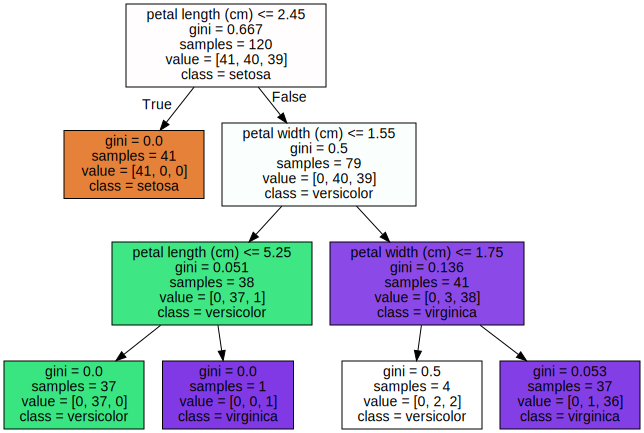

In [42]:
dt_clf = DecisionTreeClassifier(max_depth = 3, random_state=156)# 학습 수행
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)

export_graphviz(dt_clf, out_file = "tree2.dot", class_names = iris_data.target_names, \
    feature_names = iris_data.feature_names, impurity = True, filled = True) # impurity = True는 지니계수 출력, filled = True는 클래스를 색으로 분류

import graphviz

with open("tree2.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## tree3.dot: min_samples_split이 4로 샘플 데이터 수가 4보다 작으면 노드 분할을 멈춤

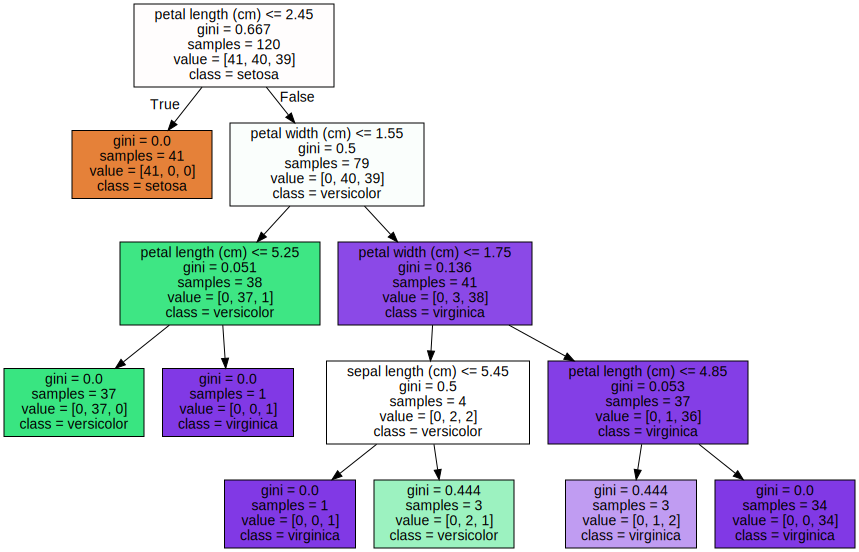

In [43]:
dt_clf = DecisionTreeClassifier(min_samples_split = 4, random_state=156)# 학습 수행
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)

export_graphviz(dt_clf, out_file = "tree3.dot", class_names = iris_data.target_names, \
    feature_names = iris_data.feature_names, impurity = True, filled = True) # impurity = True는 지니계수 출력, filled = True는 클래스를 색으로 분류

import graphviz

with open("tree3.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## tree4.dot: min_samples_leaf이 4로 분할된 좌/우 브랜치 노드에 샘플 데이터 수가 4가 남으면 노드 분할을 멈춤

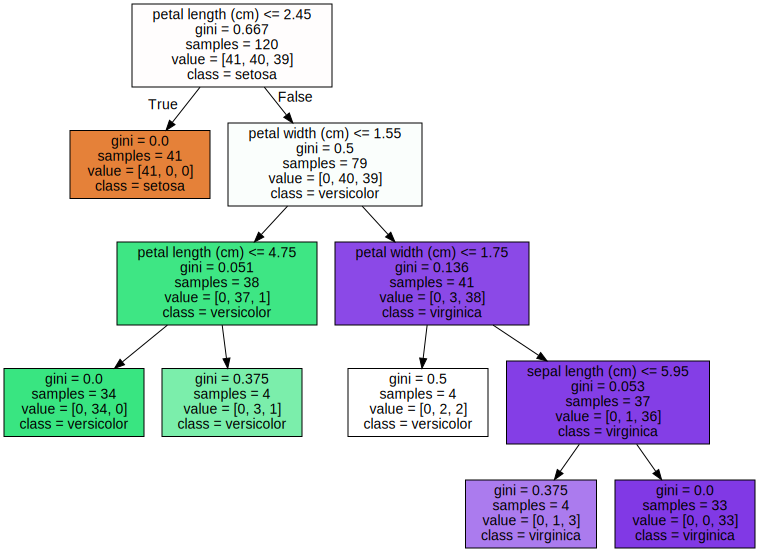

In [44]:
dt_clf = DecisionTreeClassifier(min_samples_leaf = 4, random_state=156)# 학습 수행
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)

export_graphviz(dt_clf, out_file = "tree4.dot", class_names = iris_data.target_names, \
    feature_names = iris_data.feature_names, impurity = True, filled = True) # impurity = True는 지니계수 출력, filled = True는 클래스를 색으로 분류

import graphviz

with open("tree4.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances: 
[0.006 0.    0.546 0.448]
sepal length (cm): 0.006
sepal width (cm): 0.000
petal length (cm): 0.546
petal width (cm): 0.448


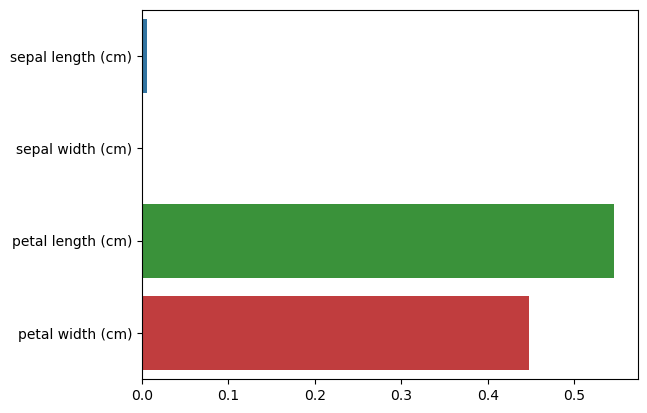

In [49]:
import matplotlib
import seaborn as sns
import numpy as np
%matplotlib inline

print("Feature importances: \n{0}".format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))

sns_plot = sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)
fig = sns_plot.get_figure()
fig.savefig("feature_importances.png")